# <span style="color:blue">Programming for Data Science - DS-GA 1007</span>
## <span style="color:blue">Assignment 6: Numpy - Part II and Matplotlib</span>
---

### Question 1: (2.0 points) 

1. (0.5 point) Create a two-dimensional numpy array called <font color='blue'>A</font> with six rows and three columns by broadcasting the array [1 2 3 4 5 6].
2. (0.5 point) Create arrays <font color='blue'>B</font> and <font color='blue'>C</font> where <font color='blue'>B</font> is a copy and <font color='blue'>C</font> is a view of <font color='blue'>A</font>, respectively. Use the methods `copy()` and `view()` from numpy and the command `id()` to make sure <font color='blue'>B</font> and <font color='blue'>C</font> do not reference to the same location as <font color='blue'>A</font>. 
3. (1.0 point) Reshape <font color='blue'>C</font> to nine rows and two columns and create a new variable <font color='blue'>D</font> by copying the rows 3,6, and 8 from <font color='blue'>D</font>. 

In [1]:
# solution 

import numpy as np
#1
A=np.zeros((6,3))
v=np.array([[1],[2],[3],[4],[5],[6]])
A=v+A

#2
B=A.copy()
C=A.view()
id(A),id(B),id(C)

#3
C=C.reshape(9,2)
D=C[[2,5,7],:].copy()

### Question 2: (2.0 points) 
Consider an $n\times n,\, n\geq 2$ array <font color='blue'>A</font>. For instance, with $n=4$:
$$
A=\left(\begin{array}[cccc]\\
1 & 3 & 2 & 6 \\
3 & 5 & 1 & {7} \\
{0} & 4 & {2} & {6} \\
6 & 1 & 3 & {1} 
\end{array}\right)
$$
Create a 2$\times$2 array <font color='blue'>B</font> where the first row corresponds to the minimal and maximal elements in the upper triangluar part of <font color='blue'>A</font> and the second row corresponds to the minimal and maximal elements in the lower triangluar part of <font color='blue'>A</font>. The main diagonal should be considered as belonging to both the upper and lower triangular part of <font color='blue'>A</font>. In the above example the solution would be 
$$
B=\left(\begin{array}[cc]\\
1 & 7  \\
0 & 6  
\end{array}\right)
$$
Your solution (the python code) should work for any $n\times n,\, n\geq 2$ array.<br>

__Hint__: Use the numpy methods "triu_indices" and "tril_indices" combined with "max" and "min".

In [116]:
# solution

n = 5
A = np.random.randint(low=0,high=30,size=(n,n))
print(A)
Au,Al=A[np.triu_indices(n)],A[np.tril_indices(n)]
Au.sort()
Al.sort()
B = np.array((Au[0],Au[-1],Al[0],Al[-1])).reshape(2,2)
print("max, min, triu, tril")
print(B)

[[17  3 15  7 18]
 [14  7 27 21 29]
 [23 19 16  0 11]
 [28  9 28 21  8]
 [26 26  5 19  7]]
max, min, triu, tril
[[ 0 29]
 [ 5 28]]


### Question 3:  (3.0 points) Linear Regression
Given a set of points $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, we can fit a line $y=\alpha_0+\alpha_1 x$ to the points by solving a linear system of the form:

$$
A^\top A\alpha = A^\top b
$$

where $A^\top$ is the transpose of $A$ and 

$$
A=\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_n 
\end{array}\right),
\qquad
\alpha = \left(\begin{array}{c}
\alpha_0 \\
\alpha_1 
\end{array}\right),
\qquad
b = \left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array}\right)
$$

Supposing the points $(x_i,y_i)$ are generated by the code:

```python
x = np.random.uniform(0,1,100)
y = 1.0-x+np.random.uniform(-0.3,0.3,100)
```

1. (1.5 points) Build the matrix (array) $A$
2. (1.5 points) Solve the linear system $A^\top A\alpha = A^\top b$ using "numpy.linalg.solve" and print the value of $\alpha_0$ and $\alpha_1$.


In [49]:
# Solution
#1
x=np.random.uniform(0,1,100)
y = 1.0-x+np.random.uniform(-0.3,0.3,100)
z=np.ones((100,1))
A=np.concatenate((z,x.reshape(100,1)),axis=1)
#2.
b=y.reshape(100,1)
B=np.matmul(A.transpose(),b)
X=np.matmul(A.transpose(),A)
a=np.linalg.solve(X,B)
a0,a1=a[0],a[1]
a0,a1

(array([0.99593407]), array([-1.05755881]))

### Question 4: (1.5 points) 
Using the result from question 3, plot the points $(x_i,y_i)$ and the fitted line. Your code should produce a figure like this: 

![title](linefit.png)

__PS.__ The figure _linefit.png_ is in the same _zip_ file as this notebook.

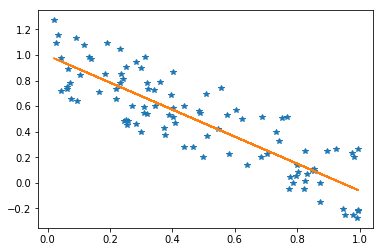

In [54]:
# Solution
import matplotlib.pyplot as plt
%matplotlib inline
line=a0+a1*x
plt.plot(x,y,'*',x,line)





### Question 5: (1.5 points) 
Enrich the plot genereted in question 4 by incorporating a legend and an annotation indicating the fitted line, similar to the figure below:

![title](annotation.png)


__PS.__ The figure _annotation.png_ is in the same _zip_ file as this notebook.

Text(0.15,0,'fitted line')

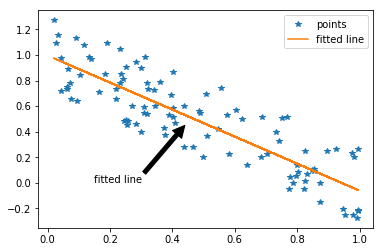

In [70]:
# Solution
plt.plot(x,y,'*',label='points')
plt.plot(x,line,label='fitted line')
plt.legend()
plt.annotate('fitted line', xy=(0.44,0.45), xytext=(0.15,0), arrowprops=dict(facecolor='black'))